## Machine learning with scikit-learn

*The following materials (including text, code, and figures) were adapted from the "SciPy 2017 Scikit-learn Tutorial" by Alexandre Gramfort and Andreas Mueller. The contents of their tutorial are licensed under Creative Commons CC0 1.0 Universal License as work dedicated to the public domain, and can be found at https://github.com/amueller/scipy-2017-sklearn.*

## What is Machine Learning?

Machine learning is the process of extracting knowledge from data automatically, usually with the goal of making predictions on new, unseen data. Put another way, you are giving samples of data to the machine, which tries to infer observations from the data.

Two key concepts:
- **automating decision making** from data **without the user specifying explicit rules** for how this decision should be made
- **generalization**: the goal of a machine learning model is to predict on new, previously unseen data

The data is usually presented to the algorithm as a two-dimensional array (or matrix) of numbers. Each data point (also known as a *sample* or *training instance*) is represented as a list of numbers, a so-called feature vector, and the features that comprise the vector represent the properties of this point. 

For instance, we can represent a dataset consisting of 150 samples and 4 features as a 2-dimensional array or matrix $\mathbb{R}^{150 \times 4}$ in the following format:


$$\mathbf{X} = \begin{bmatrix}
    x_{1}^{(1)} & x_{2}^{(1)} & x_{3}^{(1)} & \dots  & x_{4}^{(1)} \\
    x_{1}^{(2)} & x_{2}^{(2)} & x_{3}^{(2)} & \dots  & x_{4}^{(2)} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{1}^{(150)} & x_{2}^{(150)} & x_{3}^{(150)} & \dots  & x_{4}^{(150)}
\end{bmatrix}.
$$

(The superscript denotes the *i*th row, and the subscript denotes the *j*th feature, respectively.

Data in scikit-learn, with very few exceptions, is assumed to be stored as a
**two-dimensional array**, of shape `[n_samples, n_features]`.

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be Boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being "zeros" for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than NumPy arrays.

There are two kinds of machine learning we will talk about today: ***supervised learning*** and ***unsupervised learning***.

### Supervised Learning: Classification and regression

In **Supervised Learning**, we have a dataset consisting of both input features (observed quantities) and a desired output (what we want to determine).

Some examples are:

- Given a photograph of a person, identify the person in the photo.
- Given a list of movies a person has watched and their personal ratings
  of the movies, recommend a list of movies they would like.
- Given a persons age, education and position, infer their salary.

Supervised learning is further broken down into two categories, **classification** and **regression**:

- **In classification, the label is discrete**, such as "spam" or "no spam" for an email. 

- **In regression, the label is continuous** (a float output). 

In supervised learning, there is always a distinction between a **training set** for which the desired outcome (a certain label or class) is given, and a **test set** for which the desired outcome needs to be inferred. The learning model fits the predictive model to the training set, and we use the test set to evaluate its generalization performance.


### Unsupervised Learning

In **Unsupervised Learning** there is no desired output associated with the data.
Instead, we are interested in extracting some form of knowledge or model from the given data.
In a sense, you can think of unsupervised learning as a means of discovering labels from the data itself.

Unsupervised learning comprises tasks such as *dimensionality reduction*, *clustering*, and
*anomaly detection*. Some unsupervised learning problems are:

- Given detailed observations of distant galaxies, determine which features or combinations of
  features best summarize the information.
- Given a large collection of news articles, find recurring topics inside these articles.
- Given a video, isolate a moving object and categorize in relation to other moving objects which have been seen.

Sometimes the two types of learning may even be combined: e.g. unsupervised learning can be used to find useful
features in heterogeneous data, and then these features can be used within a supervised
framework.


#### Breif overview of machine learning taxonomy

![alt text](https://miro.medium.com/max/2552/1*qYrLCg4h2NVXFNw424rKIQ.png)

### A Simple Example: The Iris Dataset

As an example of a simple dataset, we're going to take a look at the iris dataset stored by scikit-learn.
The data consists of measurements of three different iris flower species.  There are three different species of iris
in this particular dataset: Iris-Setosa, Iris-Versicolor, and Iris-Virginica.

The data consist of the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica

``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [0]:
## CODE CELL 1

from sklearn.datasets import load_iris
iris = load_iris()

The resulting dataset is a ``Bunch`` object; you can see what's available using
the method ``keys()``:

In [0]:
## CODE CELL 2

iris.keys()

The features of each sample flower are stored in the ``data`` attribute of the dataset:

In [0]:
## CODE CELL 3

n_samples, n_features = iris.data.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)
# the sepal length, sepal width, petal length and petal width of the first sample (first flower)
print(iris.data[0])

The information about the class of each sample is stored in the ``target`` attribute of the dataset:

In [0]:
## CODE CELL 4

print('Target array shape:', iris.target.shape)
print('\nTarget array:', iris.target)

In [0]:
## CODE CELL 5

import numpy as np

np.bincount(iris.target)

Using the NumPy's bincount function (above), we can see that the classes are distributed uniformly in this dataset - there are 50 flowers from each species, where

- class 0: Iris-Setosa
- class 1: Iris-Versicolor
- class 2: Iris-Virginica

These class names are stored in the last attribute, namely ``target_names``:

In [0]:
## CODE CELL 6

print(iris.target_names)

This data is four dimensional, but we can visualize one or two of the dimensions
at a time using a simple histogram.  Again, we'll start by enabling
matplotlib inline mode:

In [0]:
## CODE CELL 7

%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
## CODE CELL 8

x_index = 3
colors = ['red', 'blue', 'magenta']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.hist(iris.data[iris.target==label, x_index], 
             label=iris.target_names[label],
             color=color)

plt.xlabel(iris.feature_names[x_index])
plt.legend(loc='upper right')
plt.show()

## Training and Testing Data

To evaluate how well our supervised models generalize, we can split our data into a training and a test set. Below, we use 80% of the data for training, and 20% for testing. Other splits - such as 2/3 training and 1/3 test - could also be used. The most important thing is to fairly evaluate your system on data it *has not* seen during training!

In [0]:
## CODE CELL 9

from sklearn.model_selection import train_test_split

X, y = iris.data, iris.target
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=123)
print("Labels for training and testing data")
print(train_y)
print(test_y)

**Tip: Stratified Split**

Especially for relatively small datasets, it's better to stratify the split. Stratification means that we maintain the original class proportion of the dataset in the test and training sets. For example, after we randomly split the dataset as shown in the previous code example, we have the following class proportions in percent:

In [0]:
## CODE CELL 10

print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

So, in order to stratify the split, we can pass the label array as an additional option to the `train_test_split` function:

In [0]:
## CODE CELL 11

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=123,
                                                    stratify=y)

print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

**Cross-validation**

A common way to use more of the data to build a model, but also get a more robust estimate of the generalization performance, is cross-validation.
In cross-validation, the data is split repeatedly into a training and non-overlapping test-sets, with a separate model built for every pair. The test-set scores are then aggregated for a more robust estimate.

The most common way to do cross-validation is k-fold cross-validation, in which the data is first split into k (often 5 or 10) equal-sized folds, and then for each iteration, one of the k folds is used as test data, and the rest as training data:

![alt text](https://imada.sdu.dk/~marco/Teaching/AY2010-2011/DM825/animation.gif)

This way, each data point will be in the test-set exactly once, and we can use all but a k'th of the data for training. The ``sklearn.model_selection`` module has all functions related to cross validation. For example, we can use the Stratified K-Folds cross-validator:

In [0]:
## CODE CELL 12

from sklearn.model_selection import StratifiedKFold

In [0]:
## CODE CELL 13

cv = StratifiedKFold(n_splits=5)
for train, test in cv.split(iris.data, iris.target):
    print(test)

As you can see, there are some samples from the beginning, some from the middle, and some from the end, in each of the folds.
This way, the class ratios are preserved. Let's visualize the split:

In [0]:
## CODE CELL 14

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.matshow(masks, cmap='gray_r')
    
plot_cv(StratifiedKFold(n_splits=5), iris.data, iris.target)

For more information and to see other cross-validation techniques in scikit-learn, check out the documentation: http://scikit-learn.org/stable/modules/cross_validation.html.

## Supervised Learning: Linear Regression Example

Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression. If we plot the independent variable (x) on the x-axis and dependent variable (y) on the y-axis, linear regression gives us a straight line that best fits the data points.

**Simple linear Regression**




![alt text](https://miro.medium.com/max/864/0*QG8dIxNTaBH7Qrxq)

What is the best fit?

Reduce RSS. 
What is RSS? 


Multiple linear Regression

![alt text](https://miro.medium.com/max/619/1*r3aOsJoXHX7uC2nxn2lygQ.png)

![alt text](https://miro.medium.com/max/271/1*MKaaqL--30i1a4Y3zFVELw.png)

![alt text](https://miro.medium.com/max/770/1*gc1jko6kNBj_R7QSSSn38w.png)

![alt text](https://miro.medium.com/max/374/1*vdMGX4TS7Irs4ejDFudqjQ.png)



The Boston Housing dataset contains information about various houses in Boston through different parameters. 
There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features. 

In [0]:
## CODE CELL 15

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [0]:
## CODE CELL 16
#loading the dataset direclty from sklearn
boston = datasets.load_boston()

In [0]:
## CODE CELL 17
print(boston.keys())
print('\n')
print(boston.data.shape)
print('\n')
print(boston.feature_names)

In [0]:
## CODE CELL 18
print(boston.DESCR)

In [0]:
## CODE CELL 19
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['PRICE'] = boston.target

print(bos.head())

**Data preprocessing**
After loading the data, it’s a good practice to see if there are any missing values in the data. We count the number of missing values for each feature using .isnull()

In [0]:
## CODE CELL 20
bos.isnull().sum()

In [0]:
print(bos.describe())

It seems that your minimum price is larger than zero. 

**Exploratory Data Analysis**

In [0]:
sns.distplot(bos['PRICE']);

*   Deviate from the normal distribution.
*   Have appreciable positive skewness.

In [0]:
#histogram and normal probability plot
sns.distplot(bos['PRICE'], fit=norm);
fig = plt.figure()
res = stats.probplot(bos['PRICE'], plot=plt)

From above graph, 'Price' is not normal. It shows positive skewness and does not follow the diagonal line.

Lets try log transformation



In [0]:
bos['PRICE'] = np.log(bos['PRICE'])

In [0]:
#histogram and normal probability plot
sns.distplot(bos['PRICE'], fit=norm);
fig = plt.figure()
res = stats.probplot(bos['PRICE'], plot=plt)

In [0]:
 sns.pairplot(bos)

You can also use correlation matrix for same purpose

In [0]:
correlation_matrix = bos.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Lets fit regression model with all the variable 

In [0]:
X = bos.drop('PRICE', axis = 1)
y = bos['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

# model evaluation for training set

y_train_predict = reg_all.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

In [0]:
y_pred = reg_all.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = round(reg_all.score(X_test, y_test),2)

print("The model performance for training set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

## Supervised Learning: Classification Examples

To visualize the workings of machine learning algorithms, it is often helpful to study two-dimensional or one-dimensional data, that is, data with only one or two features. While in practice, datasets usually have many more features, it is hard to plot high-dimensional data on two-dimensional screens.

We will illustrate some very simple examples before we move on to more "real world" data sets.

First, we will look at a two class classification problems in two dimensions. We use the synthetic data generated by the ``make_blobs`` function, which generates clusters of points.

In [0]:
## CODE CELL 15

from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=0)

print('X ~ n_samples x n_features:', X.shape)
print('y ~ n_samples:', y.shape)

print('\nFirst 5 samples:\n', X[:5, :])
print('\nFirst 5 labels:', y[:5])

As the data is two-dimensional, we can plot each sample as a point in a two-dimensional coordinate system, with the first feature being the x-axis and the second feature being the y-axis.

In [0]:
## CODE CELL 16

plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.xlabel('first feature')
plt.ylabel('second feature')
plt.legend(loc='upper right')
plt.show()

Again, we want to split our data into a training set and a test set.

In [0]:
## CODE CELL 17

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)

Every algorithm is exposed in scikit-learn via an ''Estimator'' object. (All models in scikit-learn have a very consistent interface). For instance, we first import the logistic regression class.

In [0]:
## CODE CELL 18

from sklearn.linear_model import LogisticRegression

Next, we instantiate the estimator object. Practically speaking, this is how we begin implementing each machine learning technique.

###  Logistic Regression


Logistic Regression is used when the dependent variable(target) is categorical.
For example,


*  To predict whether an email is spam (1) or (0)
*   Whether the tumor is malignant (1) or not (0)

![alt text](https://miro.medium.com/max/288/0*myFbLX9TVrfNbMDz.png)


linear regression is not suitable for classification problem. Linear regression is unbounded, and this brings logistic regression into picture. Their value strictly ranges from 0 to 1.


![alt text](https://miro.medium.com/max/2320/0*j4b6G61h6FGvaS16.jpg) 


![alt text](https://miro.medium.com/max/1280/0*J4lgakQXSn4muaDQ.jpg)


![alt text](https://miro.medium.com/max/818/1*ueEwU1dE0Yu-KpMJanf9AQ.png)

In [0]:
## CODE CELL 19

classifier = LogisticRegression()

How many instances are in the training set?

In [43]:
## CODE CELL 20

X_train.shape

(75, 2)

In [44]:
## CODE CELL 21

y_train.shape

(75,)

To build the model from our data, that is, to learn how to classify new points, we call the ``fit`` method with the training data and corresponding training labels (the desired output for the training data point):

In [52]:
## CODE CELL 22

classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

(Some estimator methods such as `fit` return `self` by default. Thus, after executing the code snippet above, you will see the default parameters of this particular instance of `LogisticRegression`. Another way of retrieving the estimator's ininitialization parameters is to execute `classifier.get_params()`, which returns a parameter dictionary.)

We can then apply the model to unseen data and use the model to predict the estimated outcome using the ``predict`` method:

In [0]:
## CODE CELL 23

prediction = classifier.predict(X_test)

We can compare these against the true labels:

In [47]:
## CODE CELL 24

print('prediction:', prediction)
print('true labels:', y_test)

prediction: [1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0]
true labels: [1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0]


We can evaluate our classifier quantitatively by measuring what fraction of predictions is correct. This is called **accuracy**. There is a convenience function, ``score``, that all scikit-learn classifiers have to compute this directly from the test data:

In [48]:
## CODE CELL 25

classifier.score(X_test, y_test)

0.84

It is often helpful to compare the generalization performance (on the test set) to the performance on the training set:

In [49]:
## CODE CELL 26

classifier.score(X_train, y_train)

0.9733333333333334

In [50]:
## accuracy on iris
classifier.fit(train_X, train_y)
classifier.score(test_X, test_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9666666666666667

LogisticRegression is a so-called linear model,
that means it will create a decision that is linear in the input space. In 2D, this simply means it finds a line to separate the blue from the red:


p≥0.5,class=1
p<0.5,class=0
 
For example, if our threshold was .5 and our prediction function returned .7, we would classify this observation as positive. If our prediction was .2 we would classify the observation as negative. For logistic regression with multiple classes we could select the class with the highest predicted probability.


![alt text](https://ml-cheatsheet.readthedocs.io/en/latest/_images/logistic_regression_sigmoid_w_threshold.png)




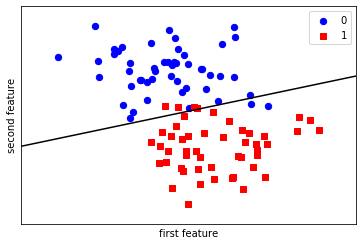

In [53]:
## CODE CELL 27

def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None):
    if eps is None:
        eps = X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]

    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, colors=['blue', 'red'])
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(classifier, X)
plt.legend(loc='upper right')

plt.show()

Iteration while optimising logistic regression cost function

![alt text](https://miro.medium.com/max/1600/1*PkEl-8DBQa-xEft_tacXLQ.gif)

**Estimated parameters**: All the estimated model parameters are attributes of the estimator object ending by an underscore. Here, these are the coefficients and the offset of the line:

In [0]:
## CODE CELL 28

print(classifier.coef_)
print(classifier.intercept_)

[[ 1.38092515 -1.49993172]]
[1.54995538]


### Another classifier: K Nearest Neighbors

Another popular and easy to understand classifier is K nearest neighbors (kNN).  It has one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

You can find nice intutative visulization demo of KNN from stanford university on the following link

http://vision.stanford.edu/teaching/cs231n-demos/knn/


![alt text](https://machinelearningknowledge.ai/wp-content/uploads/2018/08/KNN-Classification.gif)

The interface is exactly the same as for ``LogisticRegression above``.

In [0]:
## CODE CELL 29

from sklearn.neighbors import KNeighborsClassifier

This time we set a parameter of the KNeighborsClassifier to tell it we want to look at three nearest neighbors:

In [0]:
## CODE CELL 30

knn = KNeighborsClassifier(n_neighbors=3)

We fit the model with our training data:

In [59]:
## CODE CELL 31

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

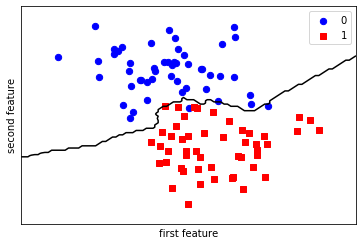

In [60]:
## CODE CELL 32

plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X)
plt.legend(loc='upper right')

plt.show()

In [61]:
## CODE CELL 33

knn.score(X_test, y_test)

0.92

Let's apply the KNeighborsClassifier to the iris dataset. How does accuracy change with different values of ``n_neighbors``?

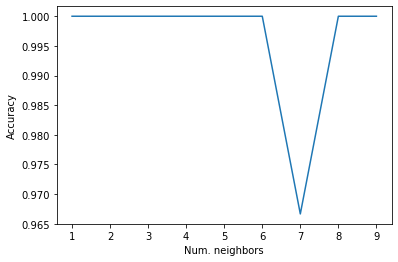

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 1.0, 1.0]


In [62]:
## CODE CELL 34

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=42)

scores = []
k_values = np.arange(1, 10)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.plot(k_values, scores)
plt.xlabel('Num. neighbors')
plt.ylabel('Accuracy')
plt.show()
print(scores)

### Model Evaluation and Scoring Metrics

The default scores in scikit-learn are ``accuracy`` for classification, which is the fraction of correctly classified samples, and ``r2`` for regression, with is the coefficient of determination.

These are reasonable default choices in many scenarious; however, depending on our task, these are not always the definitive or recommended choices.

For example: Our data might be highly imbalance.

Scikit-learn has many helpful methods in the ``sklearn.metrics`` module that can help us with model evaluation.

In [64]:
## CODE CELL 35
# Using k=3 and fitting/predicting on the iris dataset

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.50,
                                                    random_state=42,
                                                    stratify=y)

classifier = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
print("Accuracy: {}".format(classifier.score(X_test, y_test)))

Accuracy: 0.92


Here, we predicted 92% of samples correctly. For multi-class problems, it is often interesting to know which of the classes are hard to predict, and which are easy, or which classes get confused. One way to get more information about misclassifications is the ``confusion_matrix``, which shows for each true class, how frequent a given predicted outcome is.

In [65]:
## CODE CELL 36

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[25,  0,  0],
       [ 0, 25,  0],
       [ 0,  6, 19]])

A plot is sometimes more readable:

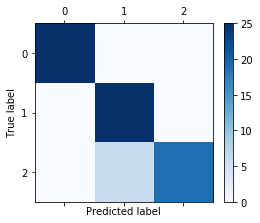

In [66]:
## CODE CELL 37

plt.matshow(confusion_matrix(y_test, y_test_pred), cmap="Blues")
plt.colorbar(shrink=0.8)
plt.xticks(range(3))
plt.yticks(range(3))
plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.show()

We can see that most entries are on the diagonal, which means that we predicted nearly all samples correctly. The off-diagonal entries show us that some 2s were classified as 1s. 

Another useful function is the ``classification_report`` which provides precision, recall, fscore and support for all classes.
With TP, FP, TN, FN standing for "true positive", "false positive", "true negative" and "false negative" repectively (follow this link for more explanation: https://developers.google.com/machine-learning/crash-course/classification/true-false-positive-negative):

Precision = TP / (TP + FP)

Precision is a measure of how many of the predictions for a class actually belong to that class. 

Recall = TP / (TP + FN)

Recall is how many of the true positives were recovered.

F1-score is the geometric average of precision and recall:

F1 = 2 x (precision x recall) / (precision + recall)

The values of all these values above are in the closed interval [0, 1], where 1 means a perfect score.

In [0]:
## CODE CELL 38

from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

These metrics are helpful in two particular cases that come up often in practice:
1. Imbalanced classes, that is, one class might be much more frequent than the other.
2. Asymmetric costs, that is, one kind of error is much more "costly" than the other.

There are several other metrics which could be used for comparing model performance; see the `sklearn.metrics` [module documentation](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) for details.

## Unsupervised Learning Example: K-Means Clustering

Clustering is the task of gathering samples into groups of similar
samples according to some predefined similarity or distance (dissimilarity)
measure, such as the Euclidean distance.

![alt text](https://www.jeremyjordan.me/content/images/2016/12/kmeans.gif)

Here, we will use one of the simplest clustering algorithms, K-means.
This is an iterative algorithm which searches for a pre-specified number of cluster
centers such that the distance from each point to its cluster is
minimized. The standard implementation of K-means uses the Euclidean distance.

For this task, we will use the iris dataset - remember, it does come with labels in the ``target`` array, but we can perform the clustering on the ``data`` array and ignore the true labels for now.

In [0]:
## CODE CELL 39

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

We can get the cluster labels either by calling fit and then accessing the 
``labels_`` attribute of the K means estimator, or by calling ``fit_predict``.
Either way, the result contains the ID of the cluster that each point is assigned to.

In [0]:
## CODE CELL 40
# X represents the data array

clusters = kmeans.fit_predict(X)
clusters

In [0]:
## CODE CELL 41
# What does the label/target array look like again?

y

Even though it appears that we recovered the partitioning of the data into clusters with some degree of accuracy, the cluster IDs we assigned were arbitrary (i.e. a cluster label of "0" may or may not correspond to the label "0" in the `target` array - again, we only used the `data` array for training the clustering algorithm). Therefore, if we want to compared our predicted labels with the true labels, we must use a different scoring metric, such as ``adjusted_rand_score``, which is invariant to permutations of the labels:

In [0]:
## CODE CELL 42

from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(y, clusters)

#### What value of "k" do we use?

In real-world datasets, the "true labels" are often unknown. In that case, how can we pre-specify the number of clusters, and what metrics can we use to compare different models?

The most important consideration is your knowledge (or a subject-matter expert's knowledge) of the data and problem at hand. In addition, there is a rule-of-thumb approach called the Elbow method which can help in finding the optimal number of clusters. The Elbow method plots the inertia, or the sum of squared distances between samples and their corresponding cluster centers, against the number of clusters.

In [0]:
## CODE CELL 43

inertia = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                random_state=0)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum-of-squares')
plt.show()

Then, we pick the value that resembles the "pit of an elbow." As we can see, this would be k=3 in this case, which makes sense given our knowledge of the dataset.

Another method of cluster model evaluation is called the silhouette coefficient or the silhouette score. Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified. A higher silhouette score indicates more well-defined clusters; that is, the clusters have less overlap between them.

In [0]:
## CODE CELL 44

from sklearn.metrics import silhouette_score

def get_silhouette_score(data, model):
    s_score = silhouette_score(data, model.labels_)
    return s_score

ss = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, 
                random_state=0)
    km_model = km.fit(X)
    ss.append(get_silhouette_score(X, km_model))

plt.plot(range(2, 11), ss, 'mo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Again, since we know we're working with data from three distinct species in this example, we don't need to go through this evaluation. However, it can be helpful when evaluating an unlabelled dataset.

## A recap on Scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface across all methods. Given a scikit-learn *estimator*
object named `model`, the following methods are available (not all for each model):

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, `fit` takes only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.decision_function()` : For classification problems, some estimators provide an uncertainty estimate that is not a probability. For binary classification, a decision_function >= 0 means the positive class will be predicted, while < 0 means the negative class.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit. For classifiers, the `score` method computes the prediction accuracy. For regressors, `score` computes the coefficient of determination (R<sup>2</sup>) of the prediction.
  + `model.transform()` : For feature selection algorithms, this will reduce the dataset to the selected features. For some classification and regression models such as some linear models and random forests, this method reduces the dataset to the most informative features. These classification and regression models can therefore also be used as feature selection methods.
  
- Available in **unsupervised estimators**
  + `model.transform()` : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()` : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.
  + `model.predict()` : for clustering algorithms, the predict method will produce cluster labels for new data points. Not all clustering methods have this functionality.
  + `model.predict_proba()` : Gaussian mixture models (GMMs) provide the probability for each point to be generated by a given mixture component.
  + `model.score()` : Density models like KDE and GMMs provide the likelihood of the data under the model.

## And there's more...

There are many more machine learning algorithms that scikit-learn covers, from support vector machines, to random forests, to neural network models. If you are interested in learning more, check out the documentation here: http://scikit-learn.org/stable/user_guide.html. The source tutorial for this notebook is also excellent - I highly recommend browsing through the notebooks and/or watching the lecture if you have time. See the link below.

*Reference*:

A. Gramfort and A. Mueller, *Scipy 2017 sklearn*, (2017), GitHub Repository, https://github.com/amueller/scipy-2017-sklearn.

https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python